In [254]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [255]:
N = 4

x, k = sp.symbols("x k", real=True)
C_s = sp.symbols(f"c:{N}")

In [256]:
a = 0
b = 1

left = lambda u: sp.diff(u, x, 2) - sp.diff(u, x) - 2 * u
right = lambda x: -3 * sp.exp(-x)

u_exact = lambda x: (x + 1) * np.exp(-x)

In [257]:
begin = u_exact(a)
end = u_exact(b)

In [258]:
phi_0 = begin + (end - begin) * x

phi_k = sp.sin(k * sp.pi * x)
# phi_k = x * k * (1 - x) ** (2 * k)

In [259]:
dphi_0 = sp.diff(phi_0)
dphi_k = sp.diff(phi_k, x)

In [260]:
u = phi_0 + sum(C_s[i] * phi_k.subs(k, i) for i in range(1, N))
R = left(u) - right(x)

In [261]:
equations = []

for i in range(1, N):
    l = sp.integrate(phi_k.subs(k, i) * R, (x, a, b))
    eq = sp.Eq(l, 0)

    equations.append(eq)

solution = sp.solve(equations, C_s)
solution_l = list(solution.values())

for i in range(1, N):
    u = u.subs(C_s[i], solution_l[i-1])

In [262]:
u

-0.264241117657115*x + 0.0437031499181653*sin(pi*x) + 0.00758310703109082*sin(2*pi*x) + 0.00220413996497197*sin(3*pi*x) + 1.0

In [263]:
u = sp.lambdify(x, u, modules=["numpy"])

x = np.linspace(a, b, 100)

u = u(x)
u_exact = u_exact(x)

In [264]:
print(np.max(np.abs(u - u_exact)))

0.0020746475985693458


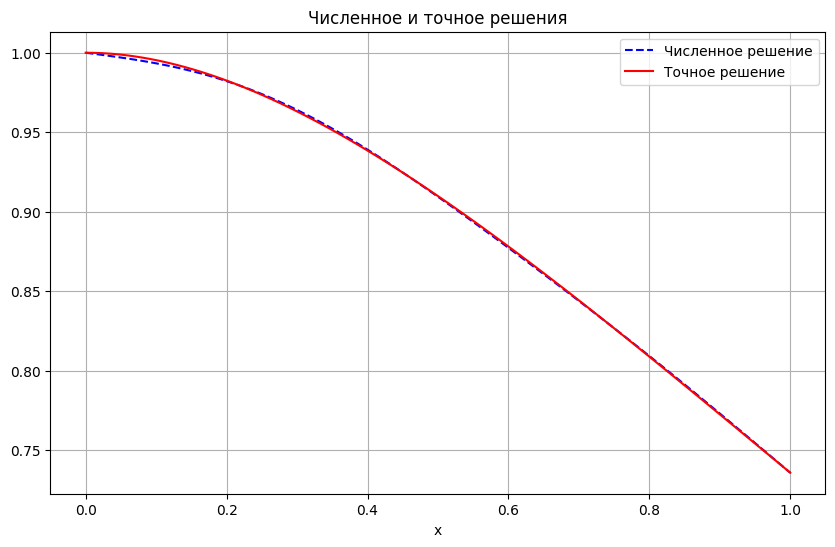

In [265]:
plt.figure(figsize=(10, 6))
plt.plot(
    x,
    u,
    "b",
    label="Численное решение",
    linestyle="--",
)

plt.plot(
    x,
    u_exact,
    "r",
    label="Точное решение",
)

plt.xlabel("x")
plt.legend()
plt.title("Численное и точное решения")
plt.grid()
plt.show()